# Manual del Usuario.

## Comandos basicos:

* **import** [libreria] **as** [abreviacion] &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp;(importa librerias y le asigna una abreviacion)
```python
ej:
import cnea as cn
import numpy as np
```



* **[abreviacion].[funcion]**(parametros) &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; ejecuta la 'funcion' definida en una libreria.
```python
ej:
np.array([1,1,1])
```



* [abreviacion].[funcion]**?** &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; (muestra una ayuda rapida de la funcion, listado parametros,outputs,etc)
```python
ej:
np.mean?
```



* **help**([objeto])  &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; ayuda sobre el objeto, sea un modulo, funcion, variable, etc  
```python
ej:
help(np.mean)
```



* **type**([objeto]) &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; devuelve el tipo de objeto
```python
ej:
type(np)
```



* modulo.**[TAB]**  &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; si se apreta tab en la ventana de la terminal aparece un listado de objetos contenidos en el modulo (funciones, modulos, variables)

![alt text](asf.png "Logo Title Text 1")




* **%whos** &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; &nbsp; &nbsp; funcion magica que lista los objetos definidos en la memoria, como el workspace del matlab



## Librerias necesarias:

* **cnea**  (libreria con las funciones definidas para el calculo de impedancias)
* **numpy** (libreria con funciones basicas para la manupulacion de vectores, matrices y operaciones)
* **matplotlib** (libreria necesaria para realizar graficos)




In [1]:
import cnea as cn

## Como ver las funciones disponibles en cada modulo


In [2]:
help(cn)

Help on package cnea:

NAME
    cnea

PACKAGE CONTENTS
    ax
    bo
    fit
    plt
    so
    theo

FILE
    c:\users\fernando\dropbox\gitlab\tesis2\dztheo\cnea\__init__.py




In [3]:
help(cn.theo)

Help on module cnea.theo in cnea:

NAME
    cnea.theo - Modulo con las funciones del theodolidus

FUNCTIONS
    dz2(f, bo, sigmas, d, mur1, mur2, lmax)
        Calculo de impedancia en aire (3.50) im(dz) para dos layers
    
    dzD(f, bo, sigma, d, mur, lmax)
        Calculo de impedancia en aire (3.50) im(dz) para una placa de espesor 'd'
    
    dzHF(f, bo, sigma, mur, lmax)
        Calculo de impedancia en aire (3.52) im(dz) para una placa de espesor infinito
    
    jhf(r, z, I, *args)
        Calculo de densidad corriente sobre una placa semi-infinita
    
    l0(bo, lmax)
    
    zo(f, bo, lmax)
        Calculo de impedancia en aire (3.34) Zo para una bobina al aire

FILE
    c:\users\fernando\dropbox\gitlab\tesis2\dztheo\cnea\theo.py




In [4]:
cn.theo.dzHF?

Signature: cn.theo.dzHF(f, bo, sigma, mur, lmax)
Docstring: Calculo de impedancia en aire (3.52) im(dz) para una placa de espesor infinito
File:      c:\users\fernando\dropbox\gitlab\tesis2\dztheo\cnea\theo.py
Type:      function


In [5]:
cn.theo.dzHF??

Signature: cn.theo.dzHF(f, bo, sigma, mur, lmax)
Source:   
def dzHF(f,bo,sigma,mur,lmax):
    """ Calculo de impedancia en aire (3.52) im(dz) para una placa de espesor infinito"""
    dzhf=list()
    mu0=4*3.14*1e-7;
    r1=bo[0];
    r2=bo[1];
    dh=bo[2];
    N=bo[3];
    z1=bo[4];
    l0=bo[5]
    aint=(1j*numpy.pi*(2*numpy.pi*f)*mu0*N**2)/(((r2-r1)*dh)**2)
    for i in range(0,len(f)):
        dzhf.append(cquad(lambda k: sig(k,sigma,f[i],mur)*(ji(k,r1,r2)*expz(k,z1,z1+dh))**2,0,lmax))
    return aint*dzhf
File:      c:\users\fernando\dropbox\gitlab\tesis2\dztheo\cnea\theo.py
Type:      function


### Ejemplo de uso

Cargamos datos del solartron con la funcion 'load' del submodulo 'so'  :

In [6]:
cn.so.load?

Signature: cn.so.load(path=0)
Docstring:
carga archivos en la carpeta actual, todos deben pertenecer a un mismo experimento, mismas frecuencias y misma cantidad de repeticiones, se le puede asginar la direccion en disco de la carpeta a la variable path (tener cuidado con los //), si path=0 abre una ventana de windows para elegirla manualmente
--------------------------------------------------------------------------------------
devuelve una lista: 
    data[0] lista de los datos de cada archivo, cada indice es una matriz con los datos crudos de cada archivo
    
    data[1] lista con los nombres de los archivos
    
    
    
File:      c:\users\fernando\dropbox\gitlab\tesis2\dztheo\cnea\so.py
Type:      function


In [7]:
data=cn.so.load()

path=   C:/Users/fernando/tesis/labs/impedancias/pp1/enero 18
0 EXP00.csv
1 EXP3948.csv
2 EXPm316p2.csv


cargo datos a la variable data

In [8]:
# el output es una matriz para cada archivo, esta matriz es un objeto del modulo numpy,
# los objetos vienen con funciones integradas
# una de ellas es la funcion "shape" que informa el tamaño del array/matriz
data[0][0].shape

(6, 451)

In [9]:
%whos

Variable   Type      Data/Info
------------------------------
cn         module    <module 'cnea' from 'C:\\<...>theo\\cnea\\__init__.py'>
data       list      n=2


In [10]:
#puedo creer una variable que sea solo la matriz de los datos del primer archivo
aire=data[0][0]
# quiero ver como aparece en el workspace
%whos

Variable   Type       Data/Info
-------------------------------
aire       ndarray    6x451: 2706 elems, type `float64`, 21648 bytes
cn         module     <module 'cnea' from 'C:\\<...>theo\\cnea\\__init__.py'>
data       list       n=2


In [11]:
# una manera de ver que funciones tiene disponible (ATRIBUTOS) un objeto, es primero ver que tipo de objeto es y 
# googlear o mirar el help()
type(aire)

numpy.ndarray

## Correcion de datos 

Para corregir los datos, usamos la funcion 'CORR' que toma como input, la frecuencia, los parametros de la bobina y la matriz de las impedancias ( que incluyend las mediciones en aire y las muestras )

In [14]:
f=cn.so.getf(data)
bo=cn.bo.bobpp1
datacorr=cn.so.corr(f,bo,data)

esta funcion devuelve una lista de vectores con las impedancias complejas, se puede ver la parte real con .real y la parte imaginaria con .imag como con cualquier array complejo de numpy.

In [15]:
datacorr[0].shape

(2, 41)

In [16]:
datacorr[1]

['EXP3948.csv', 'EXPm316p2.csv']

In [17]:
datacorr[0].real

array([[-0.08739299, -0.07768611, -0.0680787 , -0.05998935, -0.05303884,
        -0.04641606, -0.04083909, -0.03555711, -0.03075903, -0.02656591,
        -0.02240902, -0.0188109 , -0.01552346, -0.01245793, -0.00973139,
        -0.00697939, -0.00437818, -0.00213391,  0.00019685,  0.00221423,
         0.00412818,  0.00600631,  0.00761211,  0.0092089 ,  0.01068522,
         0.01213377,  0.01353784,  0.01479804,  0.01617645,  0.01734659,
         0.01847628,  0.01962493,  0.02073028,  0.02162879,  0.02258196,
         0.02333705,  0.02386795,  0.02464691,  0.02516234,  0.02557067,
         0.02607445],
       [-0.04588972, -0.04091661, -0.03609577, -0.03155848, -0.02774376,
        -0.02472542, -0.02182827, -0.01936992, -0.01708441, -0.0151089 ,
        -0.01291938, -0.01139699, -0.00994632, -0.00835718, -0.00720895,
        -0.0059324 , -0.00457806, -0.00350123, -0.00237458, -0.00136174,
        -0.00033498,  0.00074401,  0.00179192,  0.0027698 ,  0.00390297,
         0.0049319 ,  0.00620

In [18]:
datacorr[0].imag

array([[ 0.00014495, -0.00026052, -0.0001387 , -0.00020437, -0.0003001 ,
        -0.00031442, -0.00050782, -0.00061665, -0.00058394, -0.0008332 ,
        -0.00100605, -0.00121061, -0.00162977, -0.00197152, -0.00251036,
        -0.00296442, -0.00350975, -0.0041988 , -0.00488363, -0.00569346,
        -0.00661265, -0.00764577, -0.00866058, -0.00977009, -0.01108464,
        -0.01201414, -0.01338772, -0.01508929, -0.01628373, -0.01782653,
        -0.01987909, -0.02169268, -0.0234633 , -0.0248831 , -0.02711702,
        -0.0289103 , -0.03032108, -0.03316622, -0.03545249, -0.03750003,
        -0.04032702],
       [ 0.06276164,  0.06248607,  0.06255505,  0.06256132,  0.06261545,
         0.0624344 ,  0.06240979,  0.06255773,  0.06247324,  0.06243662,
         0.0624799 ,  0.06247494,  0.06244162,  0.06245441,  0.0623525 ,
         0.06237405,  0.06239356,  0.0623376 ,  0.06229522,  0.06222539,
         0.06225279,  0.06208373,  0.06208138,  0.06213982,  0.0617804 ,
         0.06174882,  0.06156

### Grafico los datos

en el modulo 'plts' hay varias funciones para dos librerias diferentes
#### matplotlib, mas sencilla y rapida
* **plts.i**(f,datacorr[n]):    
    grafica im(dz) vs f  
    
#### plotly mas interactiva, mas pesada para la memoria, instalar esto:

```bash
conda install npm
jupyter labextension install jupyterlab-plotly@4.9.0

```

* **iallraw**(data)

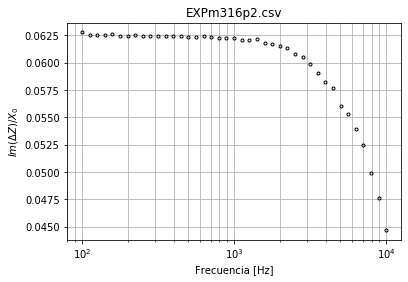

In [19]:
cn.plt.im(f,datacorr,1)

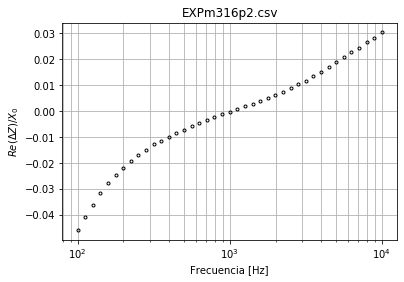

In [20]:
cn.plt.re(f,datacorr,1)

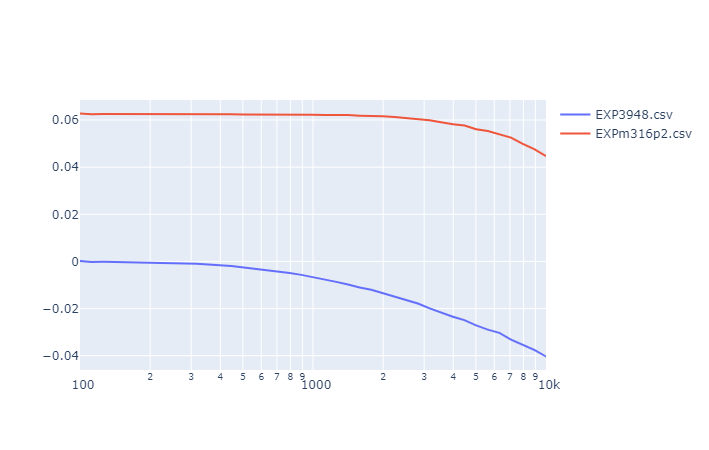

In [21]:
a=cn.plt.semilog(f,datacorr)